In [54]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [55]:
files = glob.glob('../results/a0-Apr2/e*') 

In [56]:
files, len(files)

(['../results/a0-Apr2/errors0.pkl.gz',
  '../results/a0-Apr2/errors5.pkl.gz',
  '../results/a0-Apr2/errors1.pkl.gz',
  '../results/a0-Apr2/errors9.pkl.gz',
  '../results/a0-Apr2/errors4.pkl.gz',
  '../results/a0-Apr2/errors8.pkl.gz',
  '../results/a0-Apr2/errors13.pkl.gz',
  '../results/a0-Apr2/errors65.pkl.gz',
  '../results/a0-Apr2/errors12.pkl.gz',
  '../results/a0-Apr2/errors85.pkl.gz',
  '../results/a0-Apr2/errors10.pkl.gz',
  '../results/a0-Apr2/errors17.pkl.gz',
  '../results/a0-Apr2/errors6.pkl.gz',
  '../results/a0-Apr2/errors2.pkl.gz',
  '../results/a0-Apr2/errors11.pkl.gz',
  '../results/a0-Apr2/errors3.pkl.gz',
  '../results/a0-Apr2/errors16.pkl.gz',
  '../results/a0-Apr2/errors20.pkl.gz',
  '../results/a0-Apr2/errors24.pkl.gz',
  '../results/a0-Apr2/errors18.pkl.gz',
  '../results/a0-Apr2/errors14.pkl.gz',
  '../results/a0-Apr2/errors21.pkl.gz',
  '../results/a0-Apr2/errors19.pkl.gz',
  '../results/a0-Apr2/errors22.pkl.gz',
  '../results/a0-Apr2/errors15.pkl.gz',
  '../res

In [57]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [58]:
list(enumerate(ex_list[0]))

[(0, '../results/a0-Apr2/errors0.pkl.gz'),
 (1, array([ 0.0679331 ,  0.06859481,  0.07006398,  0.06912483,  0.06723224,
          0.06696663,  0.07019323,  0.06777842,  0.06725924,  0.06845322,
          0.06853152,  0.06821379])),
 (2, array([ 0.14137906,  0.14133161,  0.14133161,  0.14133161,  0.14133161,
          0.14133161,  0.14133161,  0.14133161,  0.14133161,  0.14133161,
          0.14133161,  0.14133161])),
 (3, 15.390125036239624),
 (4, 0.068953671),
 (5, 0.1413316),
 (6, nan),
 (7, nan),
 (8, 0.10658762),
 (9, 0.19632117),
 (10, 8913),
 (11, 3.0836637020402803e-10),
 (12, [0.94197339251478507, 0.71713867169691903]),
 (13, 0.00010526214113528358),
 (14, 0.001489539160505921),
 (15, ['relu', 'relu'])]

In [59]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.02
        ex[7] = 0.02
        ex[8] = 0.005
        ex[9] = 0.005

In [60]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

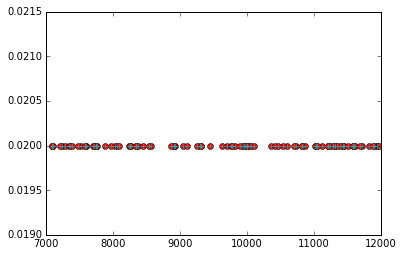

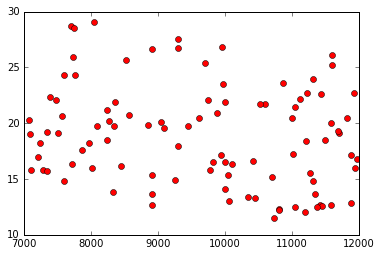

In [61]:
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

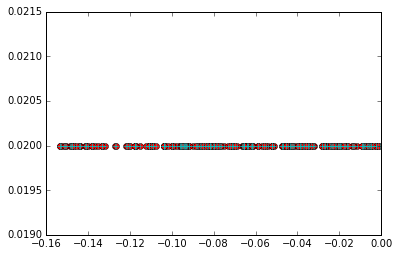

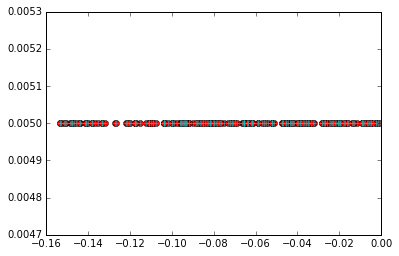

In [62]:
# l2 ほぼ効いてないけど高いほうがよさそう, 0だと学習不安定になる
plt.plot(np.log10([ex[12] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[12] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[12] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[12] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')

In [63]:
plt.plot([ex[13][0] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[13][0] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')

plt.figure()
plt.plot([ex[13][1] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[13][1] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.005)
plt.figure()

TypeError: 'float' object has no attribute '__getitem__'

(0, 0.004)

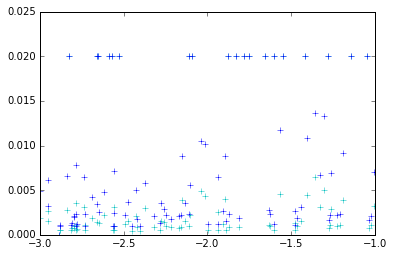

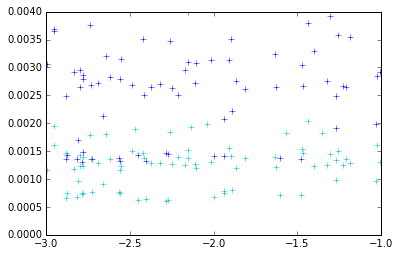

In [105]:
# lr_decay 小さいほうがいい けど高いほうがあんていする, このままでいいわ
plt.plot(np.log10([-1*(ex[14]-1)for ex in ex_list]), [ex[6] for ex in ex_list], 'c+')
plt.plot(np.log10([-1*(ex[14]-1) for ex in ex_list]), [ex[7] for ex in ex_list], '+')
plt.figure()
plt.plot(np.log10([-1*(ex[14]-1)for ex in ex_list]), [ex[8] for ex in ex_list], 'c+')
plt.plot(np.log10([-1*(ex[14]-1) for ex in ex_list]), [ex[9] for ex in ex_list], '+')
plt.ylim(0, 0.004)